In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.datasets import load_boston
data = load_boston()

## EDA

In [49]:
print(data.keys())
print(data.DESCR)
print(data.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [52]:
df = pd.DataFrame(data.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
df.columns = data.feature_names
df['PRICE'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

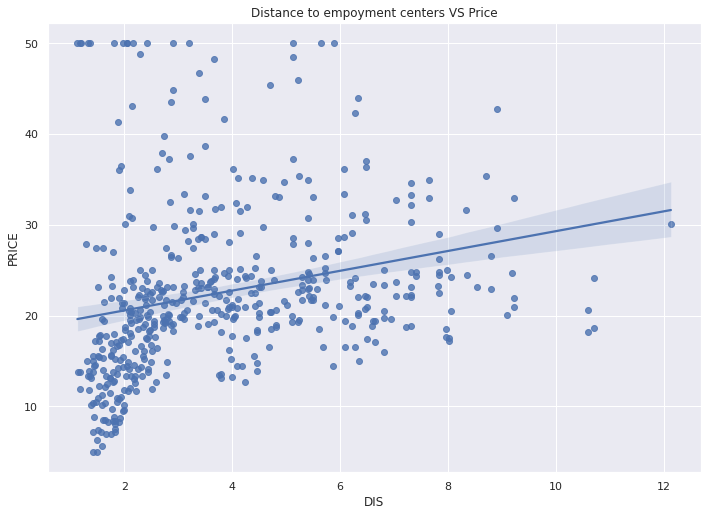

In [65]:
sns.regplot(x="DIS",y="PRICE", data=df, fit_reg=True)
plt.title("Distance to empoyment centers VS Price")
plt.show()

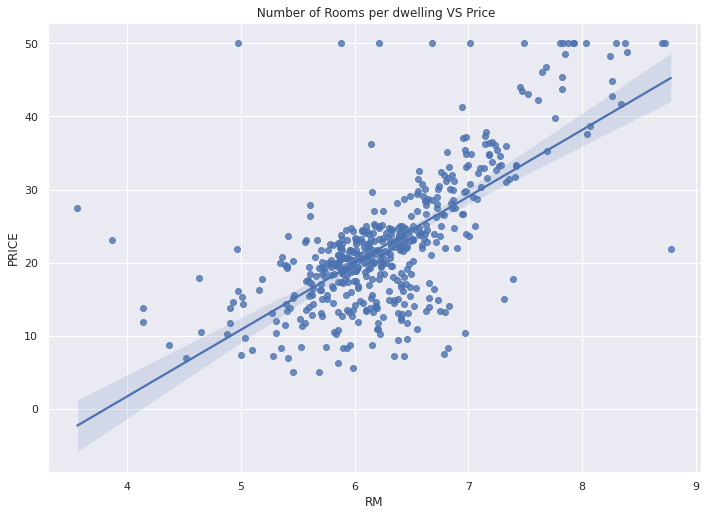

In [66]:
sns.regplot(x="RM",y="PRICE", data=df, fit_reg=True)
plt.title(" Number of Rooms per dwelling VS Price")
plt.show()

## NN

In [96]:
class NeuralNet:
    
    def __init__(self,n_input,n_neurons,n_output):
        self.n_input=n_input
        self.n_neurons=n_neurons
        self.n_output=n_output
        self.W_hidden=np.random.randn(n_input,n_neurons)
        self.b_hidden=np.zeros((1,n_neurons))
        self.W_output=np.random.randn(n_neurons,n_output)
        self.b_output=np.zeros((1,n_output))
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def forward(self,X):
        self.Z=np.dot(X,self.W_hidden)+self.b_hidden
        self.A_h=self.sigmoid(self.Z)
        self.Z_output=np.dot(self.A_h,self.W_output)+ self.b_output
        return self.Z_output
    
    def loss(self,y):
        m=y.shape[0]
        self._loss=(1/m)*(np.sum(y-self.Z_output)**2)
        return self._loss
    
    
    def backward(self,X,y):
        m=y.shape[0]
        self.d_Z=self.Z_output-y
        self.dW=(1/m)*(np.dot(self.A_h.T,self.d_Z))
        self.dB=(1/m)*(np.sum(self.d_Z))
        #tmp=np.dot(self.d_Z,self.W_output.T)
        self.d_Z1=np.dot(self.d_Z,self.W_output.T)*(self.A_h*(1-self.A_h))
        self.d_w1=(1/m)*np.dot(X.T,self.d_Z1) 
        self.d_b1=(1/m)*(np.sum(self.d_Z1))
    
    def parameter_update(self,learn_rate):
        self.W_output=self.W_output-learn_rate*self.dW
        self.b_output=self.b_output-learn_rate*self.dB
        self.W_hidden=self.W_hidden-learn_rate*self.d_w1
        self.b_hidden=self.b_hidden-learn_rate*self.d_b1
    
    def train(self,n_epochs,X,y,learn_rate):
        y=y.reshape(-1,1)
        for i in range(n_epochs+1):
            self.Z_output=self.forward(X)
            loss=self.loss(y)
            self.backward(X,y)
            self.parameter_update(learn_rate=learn_rate)
            if(i%10==0):
                print(f'Epoch{i},loss:{loss}')

In [97]:
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
x=NeuralNet(13,100,1)
x.train(200,X_train,y_train,0.01)

Epoch0,loss:170698.9970906201
Epoch10,loss:28.20843922820607
Epoch20,loss:15.419925151486746
Epoch30,loss:11.731168460299246
Epoch40,loss:8.7733544450581
Epoch50,loss:6.620750410792385
Epoch60,loss:5.118695248500663
Epoch70,loss:4.076354992382074
Epoch80,loss:3.340567584190885
Epoch90,loss:2.8050536216407123
Epoch100,loss:2.400404507246669
Epoch110,loss:2.0824840469865467
Epoch120,loss:1.823572334264541
Epoch130,loss:1.6063646684400172
Epoch140,loss:1.4200715045878223
Epoch150,loss:1.2579202261685432
Epoch160,loss:1.1155669204089183
Epoch170,loss:0.9900980795890467
Epoch180,loss:0.879416500581764
Epoch190,loss:0.7818770667281236
Epoch200,loss:0.6960826751848928


In [111]:
y_train

array([41.3, 23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8,
       33.1, 26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6,
       31.1, 26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5,
       25. , 50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4,
       21.8, 21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8,
       50. , 20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9,
       32.7, 24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9,
       24.7, 19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6,
       11. , 24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5,
       32.5, 42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4,
       30.1, 20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3,
       21.7, 50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20.6, 13.5, 48.3,
       23.8, 22.7, 17.4, 30.3, 36. , 41.7, 18.3, 22. , 18.6, 44.8, 11.9,
       18.7, 16.2, 22. ,  7.2, 20.4, 13.8, 13. , 18

In [101]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [110]:
print("Total MSE(Test Data):",np.sum(y_train-y_test.reshape(-1,1))/y_test.shape[0]-a)

Total MSE(Test Data): 11.067052023121505


In [106]:
def init_params(n_input, n_neurons, n_output):
    W1 = np.random.randn(n_input,n_neurons)
    b1 = np.zeros((1,n_neurons))
    W2 = np.random.randn(n_neurons,n_output)
    b2 = np.zeros((1,n_output))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [109]:
a=470

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params(13,100,1)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 200)